In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import numpy as np 
from scipy.stats import pearsonr
from scipy.stats import ttest_ind




## **Pokemon Analysis**

0. Data Cleaning

1. Legendary and non-Legendary Pokemon comparison
	- Exploratory data analysis
		- Histograms and statistics
		- Distribtuions
		- Shapiro-Wilk test
		- Outliers
	- Inference
		- Perform a one-sided K-S test (H₁: Legendary Pokemon tend to have higher total stats).
		- Which non-Legendary Pokemon are as strong as an average Legendary Pokemon?
		- Which stats can serve as a predictor for other stats depending on the Legendary vs. non-Legendary status?
		- Simple Linear Regresson 
		- Significant stat differences between Legendary and non-Legendary Pokemon


2. Comparison of pokemon types based on their total statistics
- For the purpose of this assignment, we assume that a Pokemon is defined only by its first type (only column 'type1'). It is conventionally considered to be the 'primary' type, as type2 is simply is the additional attribute.

## 0. Data Cleaning


In [104]:
df = pd.read_csv('Pokemon.csv')
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [105]:
df["type1"].unique()

array(['Grass', 'Fire', 'Water', 'Blastoise', 'Bug', 'Normal', 'Dark',
       'Poison', 'Electric', 'Ground', 'Ice', 'Fairy', 'Steel',
       'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying',
       'Graass'], dtype=object)

In [106]:
df[df['type1'] == 'Blastoise'].sum()


number                          9
name          Gigantamax Blasoise
type1                   Blastoise
type2                       Water
total                         530
hp                             79
attack                         83
defense                       100
sp_attack                      85
sp_defense                    105
speed                          78
generation                      1
legendary                       0
dtype: object

In [107]:
df.loc[df['type1'] == 'Blastoise', 'type2'] = ''

In [108]:
df.loc[df['type1'] == 'Blastoise', 'type1'] = 'Water' 

In [109]:
df[df['type1'] == 'Graass'].sum()


number             830
name          Eldegoss
type1           Graass
type2                0
total              460
hp                  60
attack              50
defense             90
sp_attack           80
sp_defense         120
speed               60
generation           8
legendary            0
dtype: object

In [110]:
df.loc[df['type1'] == 'Graass', 'type1'] = 'Grass' 

## 1. Legendary and non-Legendary Pokemon


### Exploratory data analysis

#### Histogram and statistics

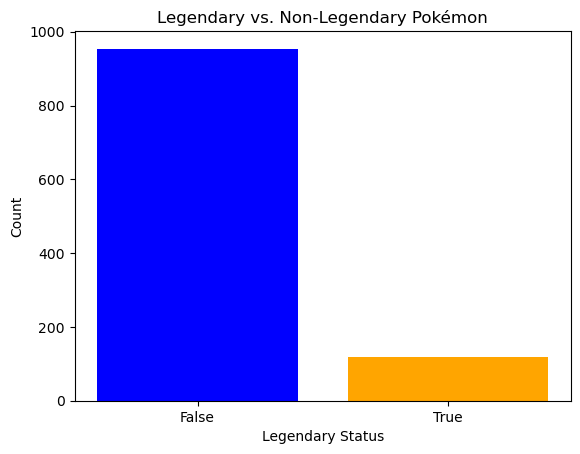

In [111]:

legendary_counts = df["legendary"].value_counts()

plt.bar(legendary_counts.index.astype(str), legendary_counts.values, color=["blue", "orange"])
plt.xlabel("Legendary Status")
plt.ylabel("Count")
plt.title("Legendary vs. Non-Legendary Pokémon")
plt.show()

In [112]:
legendary_counts = df["legendary"].value_counts()
print(legendary_counts)

legendary
False    954
True     118
Name: count, dtype: int64


In [113]:
legendary_describe = df.loc[df['legendary'] == True].describe()
legendary_describe['total']

count     118.000000
mean      618.796610
std        95.797825
min       200.000000
25%       580.000000
50%       600.000000
75%       680.000000
max      1125.000000
Name: total, dtype: float64

In [114]:
non_legendary_describe = df.loc[df['legendary'] == False].describe()
non_legendary_describe['total']

count    954.000000
mean     418.879455
std      105.006926
min      175.000000
25%      320.750000
50%      437.000000
75%      500.000000
max      700.000000
Name: total, dtype: float64

#### Distributions Legendary vs. non-Legendary

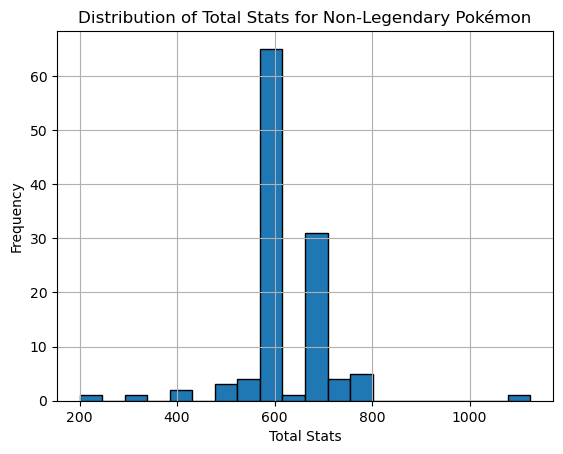

In [115]:
df.loc[df['legendary']==True, 'total'].hist(bins=20, edgecolor='black')


plt.xlabel('Total Stats')
plt.ylabel('Frequency')
plt.title('Distribution of Total Stats for Non-Legendary Pokémon')
plt.show()

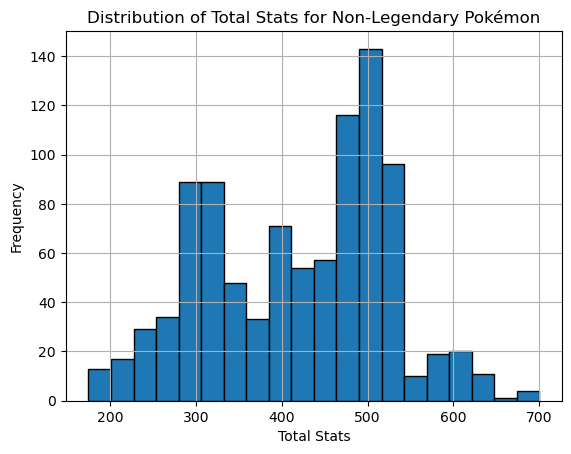

In [116]:
df.loc[df['legendary']==False, 'total'].hist(bins=20, edgecolor='black')


plt.xlabel('Total Stats')
plt.ylabel('Frequency')
plt.title('Distribution of Total Stats for Non-Legendary Pokémon')
plt.show()

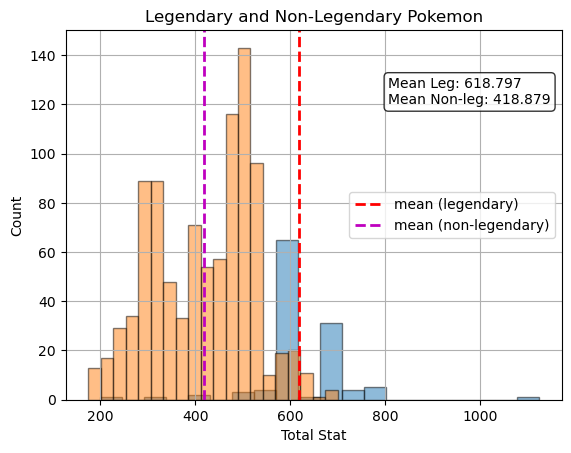

In [117]:
df.loc[df['legendary'] == True, 'total'].hist(bins=20, edgecolor='black', alpha=0.5)
df.loc[df['legendary'] == False, 'total'].hist(bins=20, edgecolor='black', alpha=0.5)

plt.annotate(
    f"Mean Leg: {legendary_describe.loc['mean', 'total']:.3f}\n"
    f"Mean Non-leg: {non_legendary_describe.loc['mean', 'total']:.3f}",
    xy=(0.65, 0.8),
    xycoords='axes fraction',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.axvline(legendary_describe.loc['mean', 'total'], color='r', linestyle='--', linewidth=2, label="mean (legendary)")
plt.axvline(non_legendary_describe.loc['mean', 'total'], color='m', linestyle='--', linewidth=2, label="mean (non-legendary)")
plt.xlabel("Total Stat")
plt.ylabel("Count")
plt.title("Legendary and Non-Legendary Pokemon")
plt.legend()
plt.show()


#### Shapiro-Wilk test

In [118]:
stat, pvalue = stats.shapiro(df.loc[df['legendary'] == False,'total'])
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {pvalue}")
if pvalue>0.01:
    print('fail to reject h0, follows a normal distribution')
else:
    print('reject h0, does NOT follow a normal distribution')

Shapiro-Wilk Test Statistic: 0.967610545828641
P-value: 9.858935140111375e-14
reject h0, does NOT follow a normal distribution


In [119]:
stat, pvalue = stats.shapiro(df.loc[df['legendary'] == True,'total'])
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {pvalue}")
if pvalue>0.01:
    print('fail to reject h0, follows a normal distribution')
else:
    print('reject h0, does NOT follow a normal distribution')

Shapiro-Wilk Test Statistic: 0.804390076366182
P-value: 3.115869636295679e-11
reject h0, does NOT follow a normal distribution


In [120]:
stat, pvalue = stats.shapiro(df['total'])
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {pvalue}")
if pvalue>0.01:
    print('fail to reject h0, follows a normal distribution')
else:
    print('reject h0, does NOT follow a normal distribution')

Shapiro-Wilk Test Statistic: 0.9768812398657671
P-value: 4.8085112696331456e-12
reject h0, does NOT follow a normal distribution


#### Outliers

Text(0.5, 1.0, 'Box Plot of Total Stats')

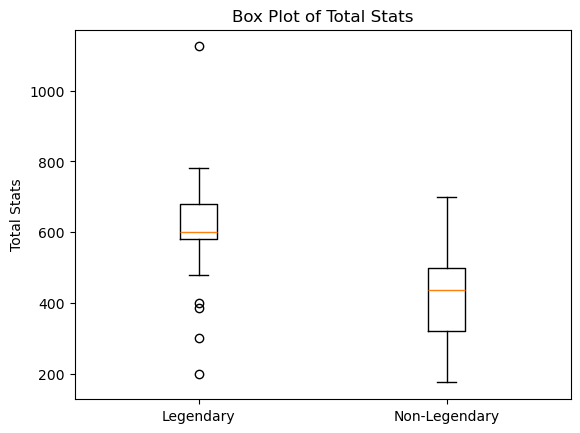

In [121]:
box_data = [df.loc[df['legendary'] == True,'total'],df.loc[df['legendary'] == False,'total']]

plt.boxplot(box_data, tick_labels = ["Legendary","Non-Legendary"])
plt.ylabel('Total Stats')
plt.title('Box Plot of Total Stats')

In [122]:
non_legendary_pokemon = df.loc[df['legendary'] == False]
legendary_pokemon = df.loc[df['legendary'] == True]

In [123]:
legendary_pokemon.loc[legendary_pokemon['total'] > 900]

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1057,890,Eternamax Eternatus,Poison,Dragon,1125,255,115,250,125,250,130,8,True


### Inference

Perform a one-sided K-S test (H₁: Legendary Pokemon tend to have higher total stats)

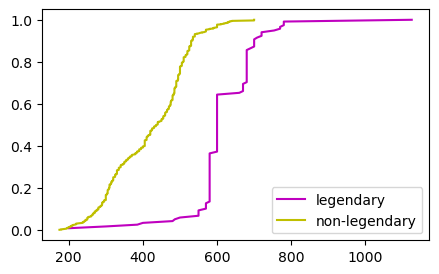

In [124]:
fig, ax = plt.subplots(figsize = (5,3))

sorted_sample1 = np.sort(df[df['legendary'] == True]['total'])
ecdf1 = np.arange(1,len(sorted_sample1)+1)/len(sorted_sample1)
ax.plot(sorted_sample1, ecdf1, color = 'm', label = 'legendary')

sorted_sample2 = np.sort(df[df['legendary'] == False]['total'])
ecdf1 = np.arange(1,len(sorted_sample2)+1)/len(sorted_sample2)
ax.plot(sorted_sample2, ecdf1, color = 'y', label = 'non-legendary')

plt.legend()
plt.show()

In [125]:

ks_stat, p_value = stats.ks_2samp(sorted_sample2, sorted_sample1, alternative='greater')

print(f"K-S Statistic: {ks_stat:.3f}")
print(f"P-value: {p_value:.5f}")

alpha = 0.05  
if p_value < alpha:
    print("Reject H₀: Legendary Pokemon have significantly higher total stats than Non-Legendary Pokemon.")
else:
    print("Fail to reject H₀: No significant evidence that Legendary Pokemon have higher total stats.")


K-S Statistic: 0.875
P-value: 0.00000
Reject H₀: Legendary Pokemon have significantly higher total stats than Non-Legendary Pokemon.


#### Which non-Legendary Pokemon are as strong as an average Legendary Pokemon?

In [126]:
non_legendary_pokemon.loc[(non_legendary_pokemon['total'] >= 580) & (non_legendary_pokemon['total'] <= 620)].value_counts()


number  name             type1     type2     total  hp   attack  defense  sp_attack  sp_defense  speed  generation  legendary
80      Mega Slowbro     Water     Psychic   590    95   75      180      130        80          30     1           False        1
94      Mega Gengar      Ghost     Poison    600    60   65      80       170        95          130    1           False        1
784     Kommo-o          Dragon    Fighting  600    75   110     125      100        105         85     7           False        1
635     Hydreigon        Dark      Dragon    600    92   105     90       125        90          98     5           False        1
475     Mega Gallade     Psychic   Fighting  618    68   165     95       65         115         110    4           False        1
460     Mega Abomasnow   Grass     Ice       594    90   132     105      132        105         30     4           False        1
445     Garchomp         Dragon    Ground    600    108  130     95       80         85 

In [127]:
legendary_pokemon.loc[(legendary_pokemon['total'] >= 580) & (legendary_pokemon['total'] <= 620)].value_counts()


number  name                       type1     type2     total  hp   attack  defense  sp_attack  sp_defense  speed  generation  legendary
144     Articuno                   Ice       Flying    580    90   85      100      95         125         85     1           True         1
642     Thundurus Therian Forme    Electric  Flying    580    79   105     70       145        80          101    5           True         1
893     Dada Zarude                Dark      Grass     600    105  120     105      70         95          105    8           True         1
802     Marshadow                  Fighting  Ghost     600    90   125     80       90         90          125    7           True         1
801     Magearna                   Steel     Fairy     600    80   95      115      130        115         65     7           True         1
721     Volcanion                  Fire      Water     600    80   110     120      130        90          70     6           True         1
720     Hoopa Conf

##### Which stats can serve as a predictor for other stats depending on the Legendary vs. non-Legendary type?

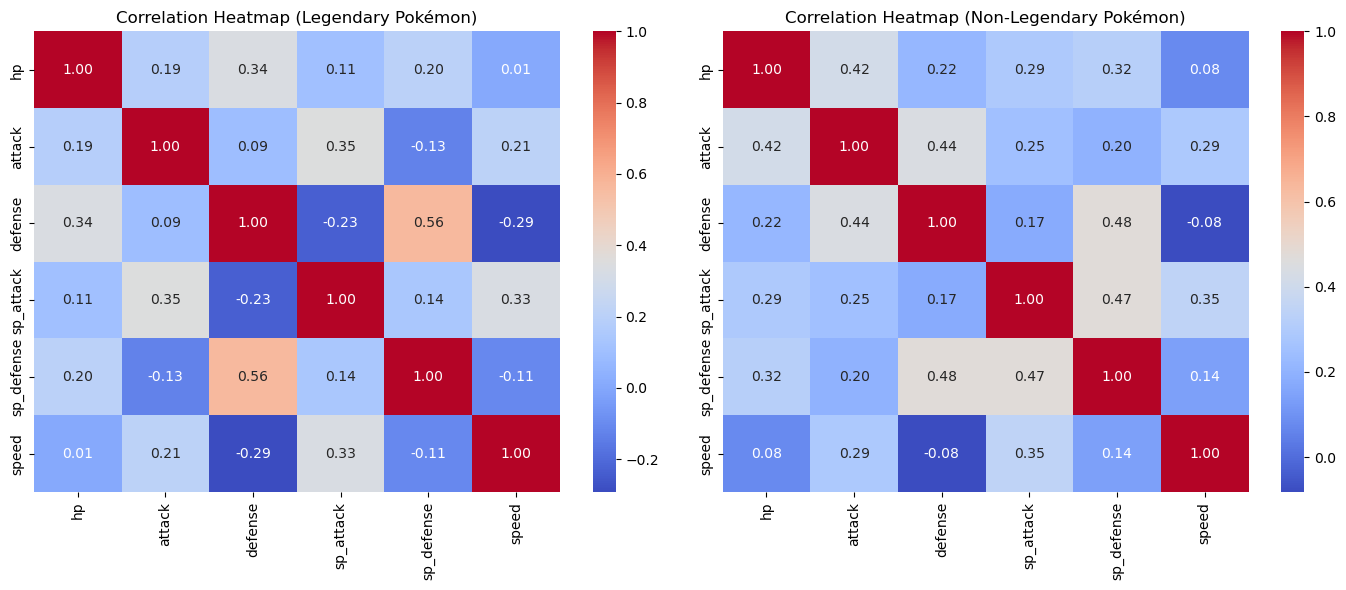

In [128]:

p_m_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

legendary_pokemon_T = df[df['legendary'] == True][p_m_stats ]
non_legendary_pokemon_T = df[df['legendary'] == False][p_m_stats ]

legendary_corr = legendary_pokemon_T .corr()
non_legendary_corr = non_legendary_pokemon_T.corr()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(legendary_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap (Legendary Pokémon)")

sns.heatmap(non_legendary_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap (Non-Legendary Pokémon)")

plt.tight_layout()
plt.show()

In [129]:
for i in range(len(p_m_stats)):
    for j in range(i + 1, len(p_m_stats)):  
        stat1 = p_m_stats[i]
        stat2 = p_m_stats[j]
        
        r_legendary, p_legendary = pearsonr(legendary_pokemon_T[stat1], legendary_pokemon_T[stat2])
        
        r_non_legendary, p_non_legendary = pearsonr(non_legendary_pokemon_T[stat1], non_legendary_pokemon_T[stat2])
        
        print(f"{stat1} vs {stat2}")
        print(f"  Legendary: Correlation = {r_legendary:.2f}, P-value = {p_legendary:.4f}")
        print(f"  Non-Legendary: Correlation = {r_non_legendary:.2f}, P-value = {p_non_legendary:.4f}")
        print("-" * 50)

hp vs attack
  Legendary: Correlation = 0.19, P-value = 0.0446
  Non-Legendary: Correlation = 0.42, P-value = 0.0000
--------------------------------------------------
hp vs defense
  Legendary: Correlation = 0.34, P-value = 0.0002
  Non-Legendary: Correlation = 0.22, P-value = 0.0000
--------------------------------------------------
hp vs sp_attack
  Legendary: Correlation = 0.11, P-value = 0.2495
  Non-Legendary: Correlation = 0.29, P-value = 0.0000
--------------------------------------------------
hp vs sp_defense
  Legendary: Correlation = 0.20, P-value = 0.0274
  Non-Legendary: Correlation = 0.32, P-value = 0.0000
--------------------------------------------------
hp vs speed
  Legendary: Correlation = 0.01, P-value = 0.9277
  Non-Legendary: Correlation = 0.08, P-value = 0.0195
--------------------------------------------------
attack vs defense
  Legendary: Correlation = 0.09, P-value = 0.3065
  Non-Legendary: Correlation = 0.44, P-value = 0.0000
-------------------------------

##### Simple Linear Regresson 

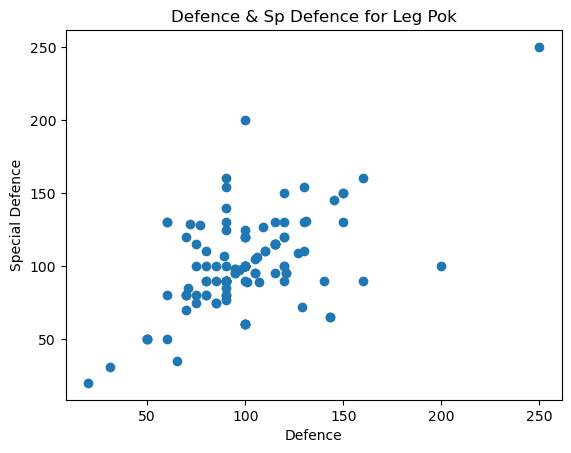

In [130]:
x = df[df['legendary'] == True]['defense']
y = df[df['legendary'] == True]['sp_defense']
plt.scatter(x,y)
plt.title('Defence & Sp Defence for Leg Pok')
plt.xlabel('Defence')
plt.ylabel('Special Defence')
plt.show()

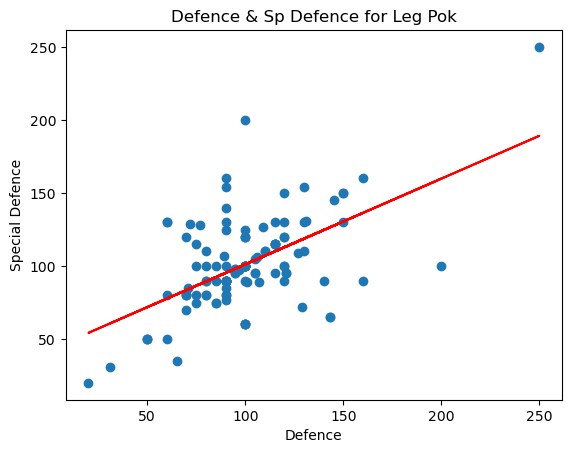

In [131]:
x = df[df['legendary'] == True]['defense']
y = df[df['legendary'] == True]['sp_defense']

slope, intercept = np.polyfit(x, y, 1)
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='red', label='Regression Line')


plt.scatter(x,y)
plt.title('Defence & Sp Defence for Leg Pok')
plt.xlabel('Defence')
plt.ylabel('Special Defence')
plt.show()

In [132]:
x = sm.add_constant(x)
model_sm = sm.OLS(y,x).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sp_defense   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     53.33
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           3.84e-11
Time:                        17:40:03   Log-Likelihood:                -551.73
No. Observations:                 118   AIC:                             1107.
Df Residuals:                     116   BIC:                             1113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.5354      8.376      5.078      0.000      25.946      59.124
defense        0.5865      0.080      7.303      0.000       0.427       0.746
==============================================================================
Omnibus:                       12.030   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.518
Skew:                           0.506   Prob(JB):                     0.000157
Kurtosis:                       4.594   Cond. No.                         362.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

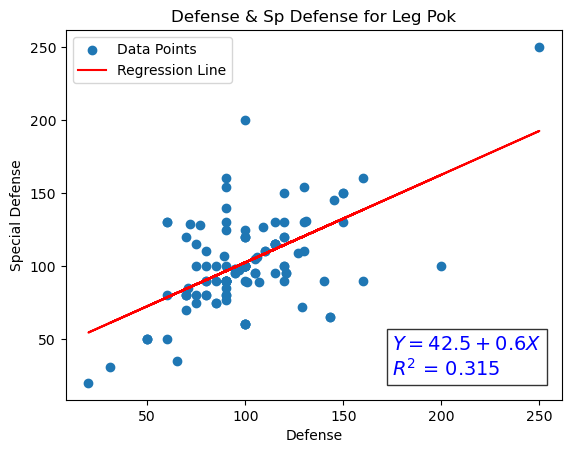

In [133]:
x = df[df['legendary'] == True]['defense']
y = df[df['legendary'] == True]['sp_defense']

slope, intercept = 0.6, 42.5 
y_fit = slope * x + intercept
r_squared = 0.315  

plt.scatter(x, y, label='Data Points')
plt.plot(x, y_fit, color='red', label='Regression Line')

formula_text = r"$Y = 42.5 + 0.6X$" + f"\n$R^2$ = {r_squared:.3f}"
plt.text(max(x) * 0.7, max(y) * 0.1, formula_text, fontsize=14, color='blue', 
         bbox=dict(facecolor='white', alpha=0.8))
plt.title('Defense & Sp Defense for Leg Pok')
plt.xlabel('Defense')
plt.ylabel('Special Defense')
plt.legend()
plt.show()

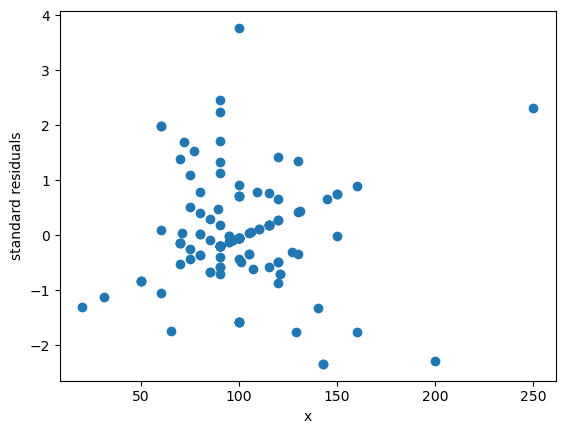

94.0677966101695 % of the standardized residuals fall within [-2, 2]


In [134]:
st_residuals = model_sm.resid_pearson

plt.scatter(x, st_residuals)
plt.xlabel('x')
plt.ylabel('standard residuals')
plt.show()

print(100 * (sum([1 for i in st_residuals if -2 <= i <= 2]) / len(st_residuals)), '% of the standardized residuals fall within [-2, 2]')


##### Significant stat differences between Legendary vs. Non-Legendary Pokemon

                  hp      attack    defense   sp_attack  sp_defense      speed
legendary                                                                     
False      67.322851   77.020964  71.887841   68.677149   68.935010  65.093291
True       96.067797  112.610169  99.872881  110.432203  101.110169  98.703390


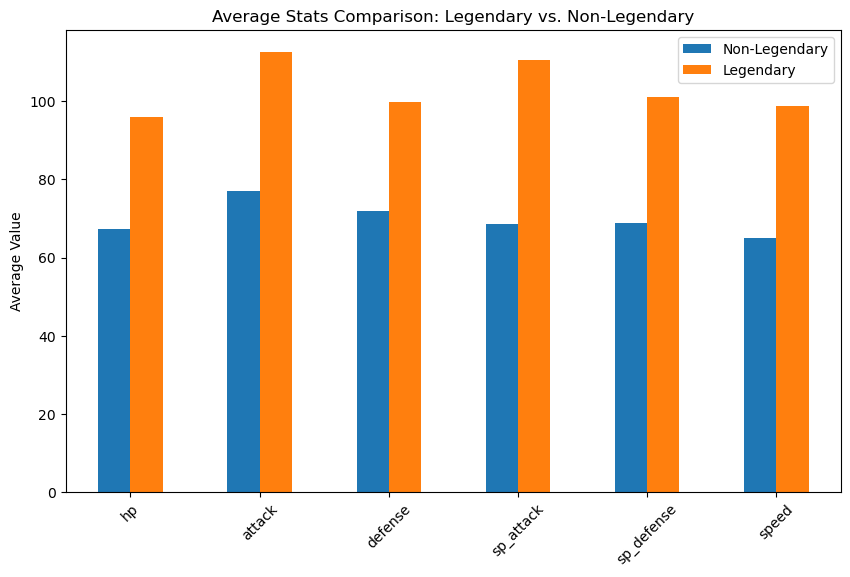

In [135]:
stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
mean_values = df.groupby('legendary')[stat_columns].mean()

print(mean_values)
mean_values.T.plot(kind='bar', figsize=(10,6))
plt.title("Average Stats Comparison: Legendary vs. Non-Legendary")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(["Non-Legendary", "Legendary"])
plt.show()

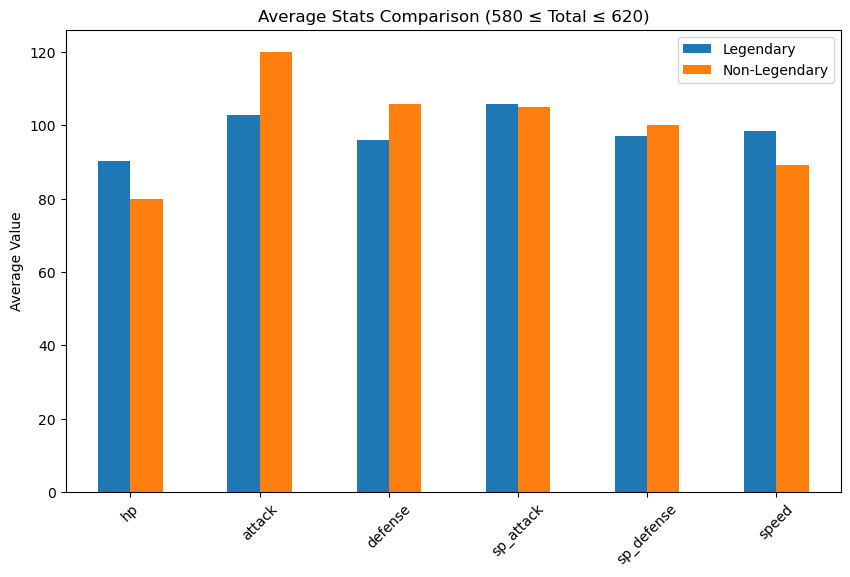

In [136]:

stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

filtered_legendary = legendary_pokemon.loc[
    (legendary_pokemon['total'] >= 580) & (legendary_pokemon['total'] <= 620)
]

filtered_non_legendary = non_legendary_pokemon.loc[
    (non_legendary_pokemon['total'] >= 580) & (non_legendary_pokemon['total'] <= 620)
]

mean_legendary = filtered_legendary[stat_columns].mean()
mean_non_legendary = filtered_non_legendary[stat_columns].mean()

mean_values = pd.DataFrame({
    'Legendary': mean_legendary,
    'Non-Legendary': mean_non_legendary
})

mean_values.plot(kind='bar', figsize=(10,6))
plt.title("Average Stats Comparison (580 ≤ Total ≤ 620)")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(["Legendary", "Non-Legendary"])
plt.show()


Null Hypothesis (H₀):

    There is no difference between the stats of Legendary and non-Legendary Pokemon. Specifically, the mean stat values of legendary Pokemon are equal to those of non-Legendary Pokemon.

Where:

    μ_legendary = Mean stat value for Legendary Pokemon.
    μ_non_legendary = Mean stat value for non-Legendary Pokemon.

Alternative Hypothesis (H₁):

    There is a difference between the stats of legendary and non-legendary Pokemon. This can either be that one is higher than the other (which is why we check the p-value for significance).


In [137]:
stats_to_check = ['hp', 'attack', 'speed', 'defense']

variance_legendary = legendary_pokemon[stats_to_check].var()
variance_non_legendary = non_legendary_pokemon[stats_to_check].var()

variance_df = pd.DataFrame({
    'Legendary Variance': variance_legendary,
    'Non-Legendary Variance': variance_non_legendary
})

print(variance_df)


         Legendary Variance  Non-Legendary Variance
hp               908.456903              608.697337
attack           955.829639              927.462309
speed            810.398450              792.619829
defense          908.727292              896.674710


In [138]:

stats_to_test = ['hp', 'attack', 'speed', 'defense']

t_test_results = {}
for stat in stats_to_test:
    t_stat, p_value = ttest_ind(
        legendary_pokemon[stat], 
        non_legendary_pokemon[stat], 
        equal_var=False  # Welch’s t-test
    )
    t_test_results[stat] = {'t-statistic': t_stat, 'p-value': p_value}

print("\nWelch’s t-test Results:")
for stat, result in t_test_results.items():
    print(f"\nStat: {stat}")
    print(f"  t-statistic: {result['t-statistic']:.4f}")
    print(f"  p-value: {result['p-value']:.4f}")
    
    # Check significance
    if result['p-value'] < 0.05:
        print("  → Significant difference (reject H0 ✅)")
    else:
        print("  → No significant difference (fail to reject H0 ❌)")
    print("-" * 40)



Welch’s t-test Results:

Stat: hp
  t-statistic: 9.9554
  p-value: 0.0000
  → Significant difference (reject H0 ✅)
----------------------------------------

Stat: attack
  t-statistic: 11.8156
  p-value: 0.0000
  → Significant difference (reject H0 ✅)
----------------------------------------

Stat: speed
  t-statistic: 12.1133
  p-value: 0.0000
  → Significant difference (reject H0 ✅)
----------------------------------------

Stat: defense
  t-statistic: 9.5202
  p-value: 0.0000
  → Significant difference (reject H0 ✅)
----------------------------------------


## 2. Pokemon comparison by type

### Hypothesis: dragon type is on average stronger based on its total statistics

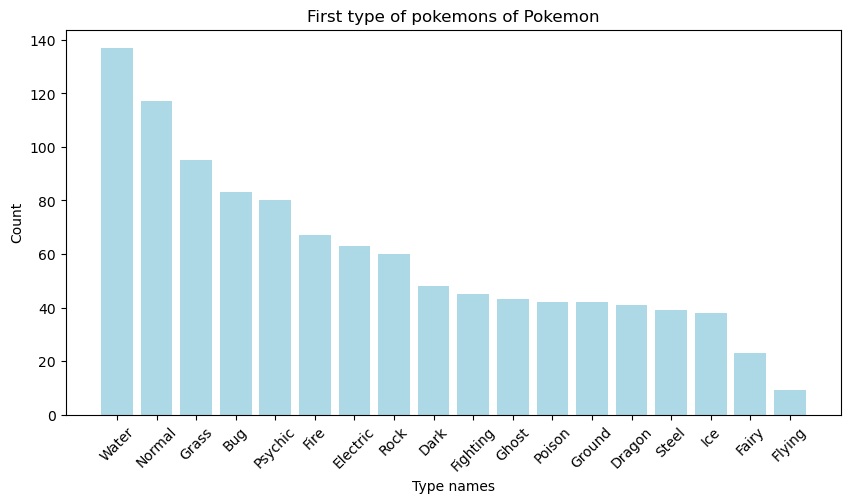

In [139]:

plt.figure(figsize=(10, 5))  
type_counts = df["type1"].value_counts()

plt.bar(type_counts.index.astype(str), type_counts.values, color=["lightblue"])
plt.xticks(rotation=45)
plt.xlabel("Type names")
plt.ylabel("Count")
plt.title("First type of pokemons of Pokemon")
plt.show()


In [140]:
type_counts = df["type1"].value_counts()
print(type_counts)

type1
Water       137
Normal      117
Grass        95
Bug          83
Psychic      80
Fire         67
Electric     63
Rock         60
Dark         48
Fighting     45
Ghost        43
Poison       42
Ground       42
Dragon       41
Steel        39
Ice          38
Fairy        23
Flying        9
Name: count, dtype: int64


In [141]:
type_stats_total = df.groupby("type1")["total"].describe()
type_stats_total


,count,mean,std,min,25%,50%,75%,max
type1,,,,,,,,
Bug,83.0,384.746988,119.336156,180.0,287.5,395.0,490.00,600.0
Dark,48.0,439.562500,116.193329,220.0,346.0,450.5,510.00,680.0
Dragon,41.0,536.365854,147.306442,270.0,420.0,600.0,680.00,780.0
Electric,63.0,450.333333,103.315208,205.0,385.0,481.0,520.00,610.0
Fairy,23.0,441.695652,139.086446,218.0,332.0,462.0,510.00,720.0
Fighting,45.0,452.311111,112.359978,210.0,377.0,470.0,510.00,720.0
Fire,67.0,458.582090,104.926403,250.0,375.5,484.0,534.00,680.0
Flying,9.0,446.111111,130.785554,245.0,365.0,495.0,535.00,580.0
Ghost,43.0,444.674419,103.846434,275.0,335.0,476.0,500.00,680.0


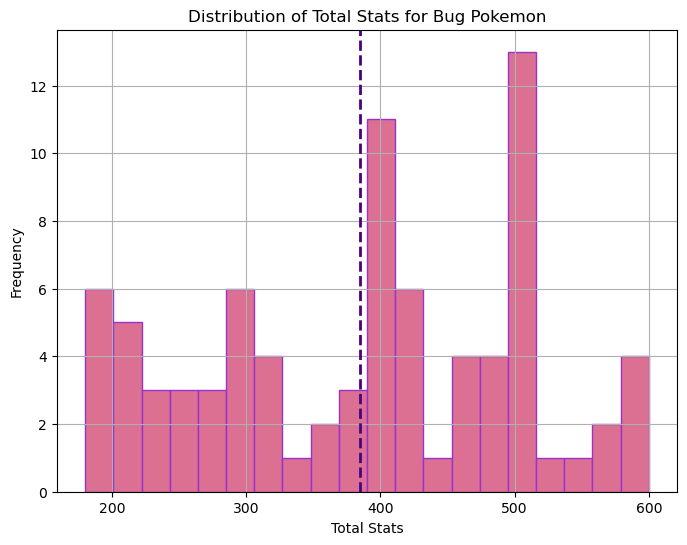

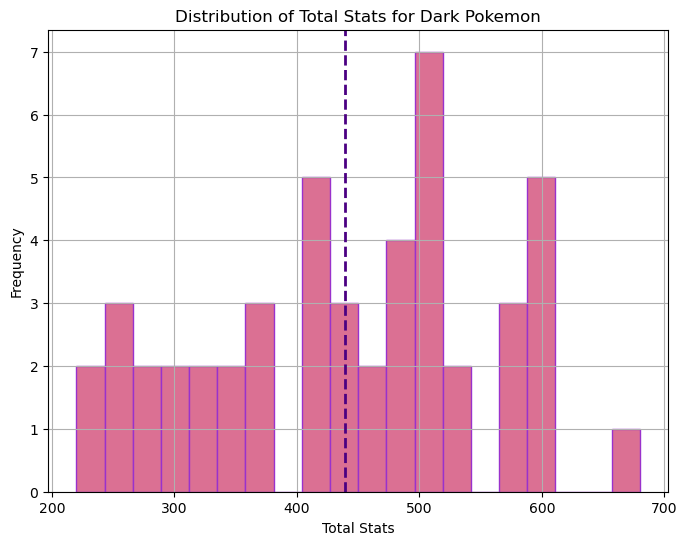

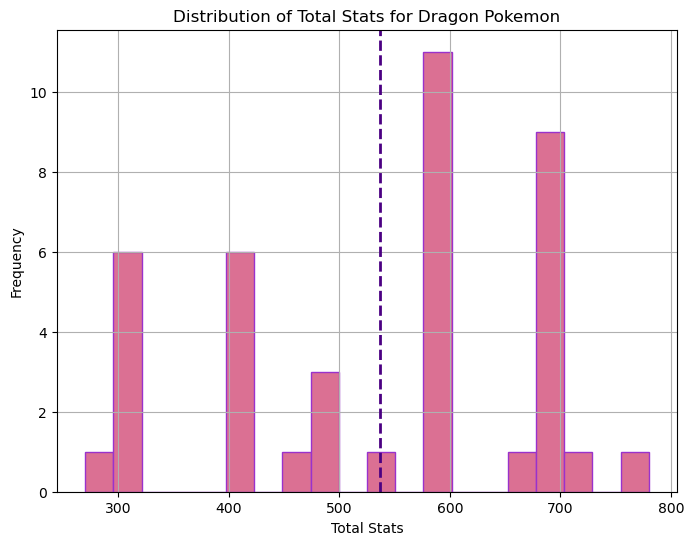

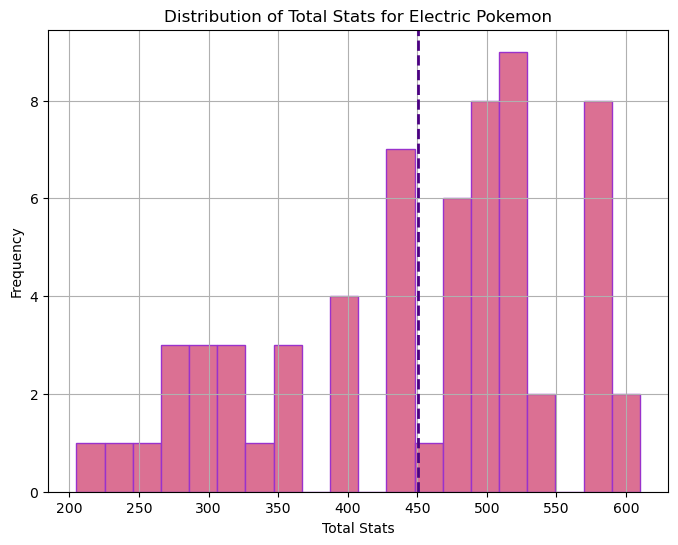

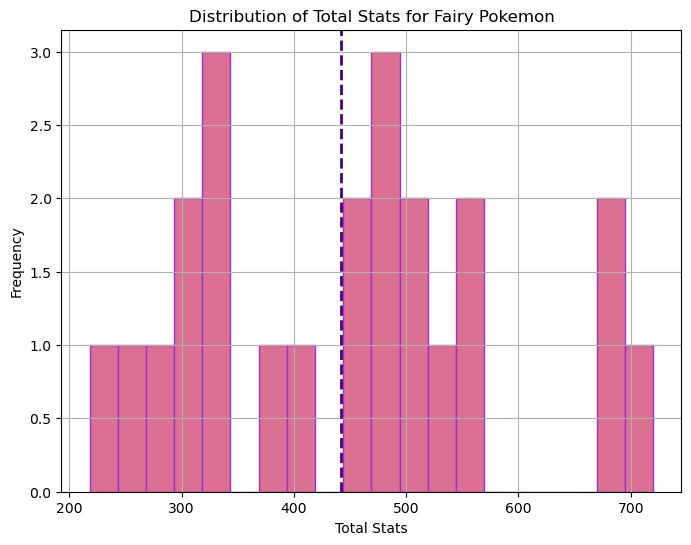

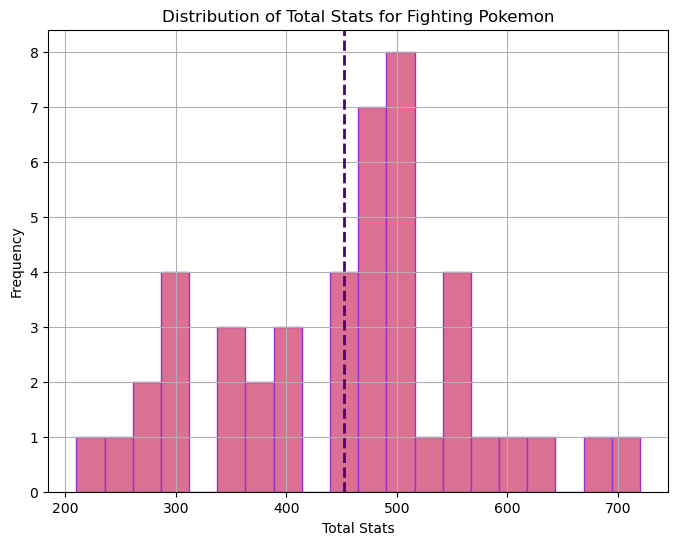

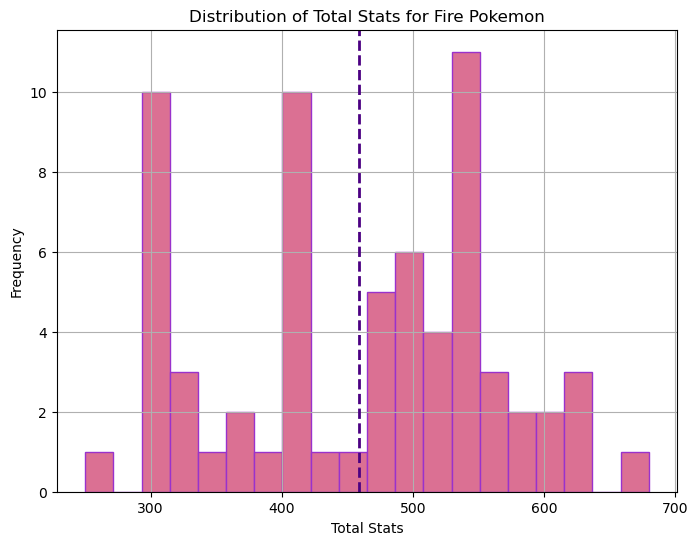

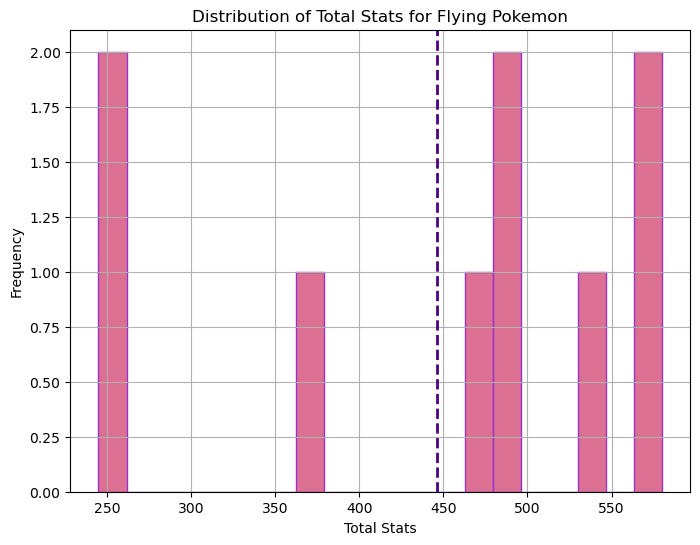

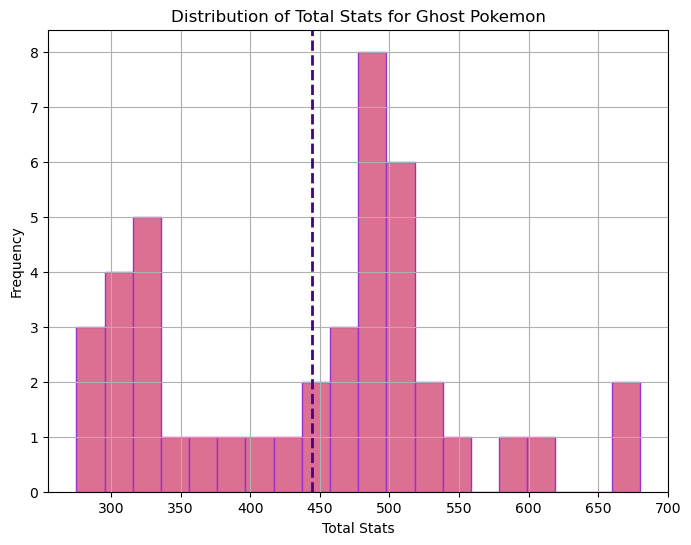

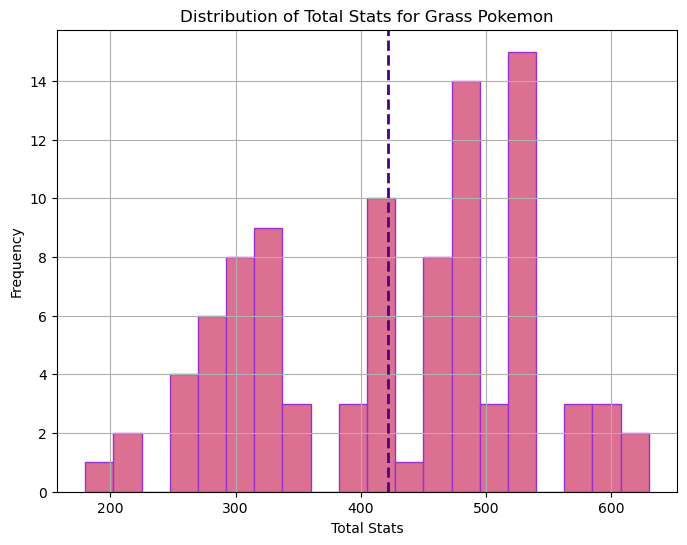

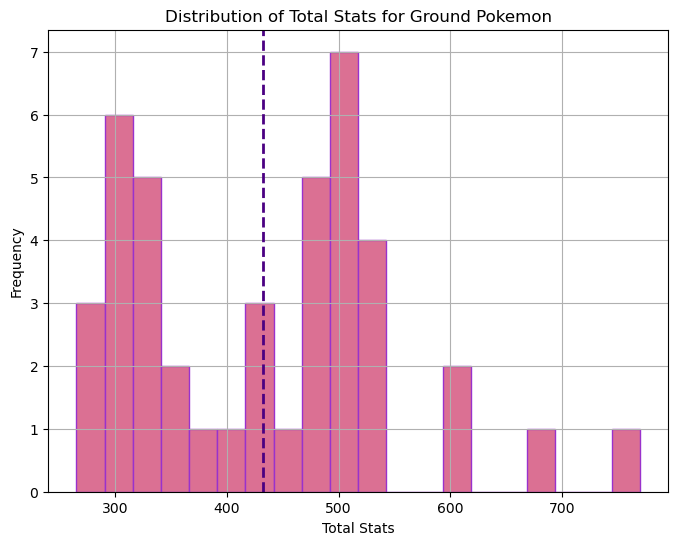

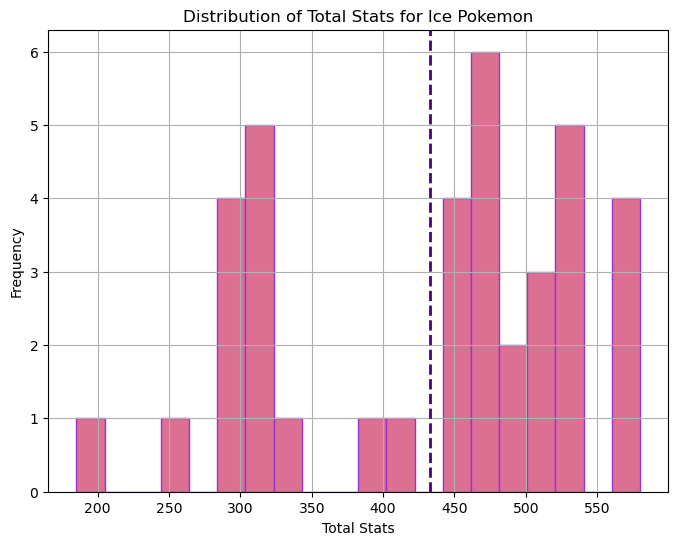

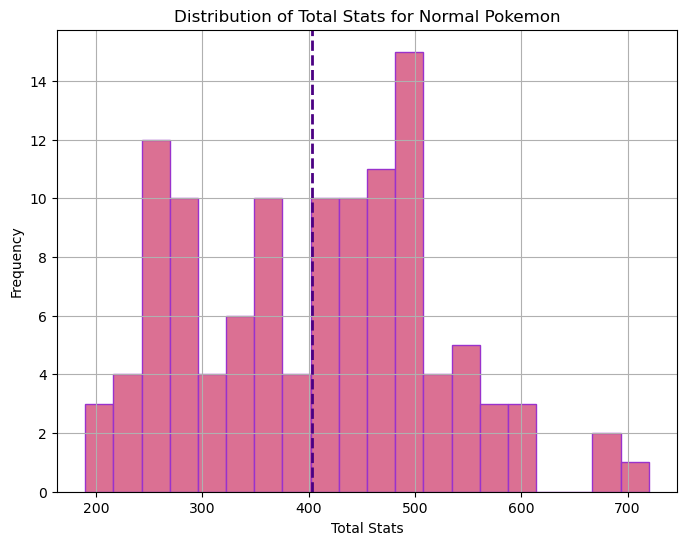

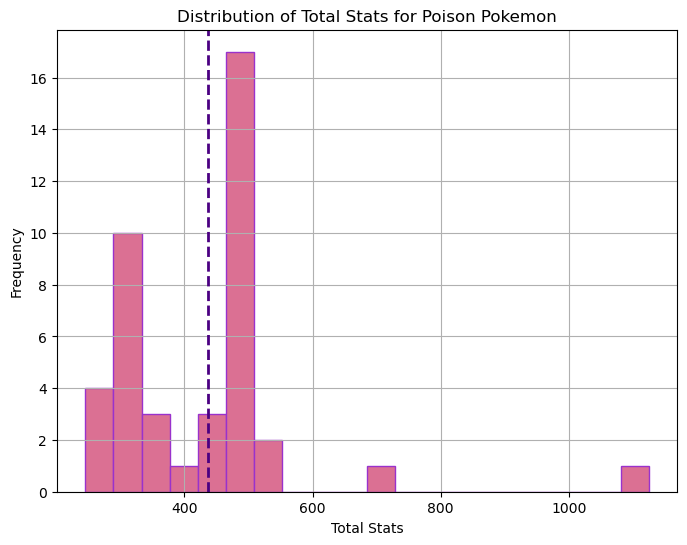

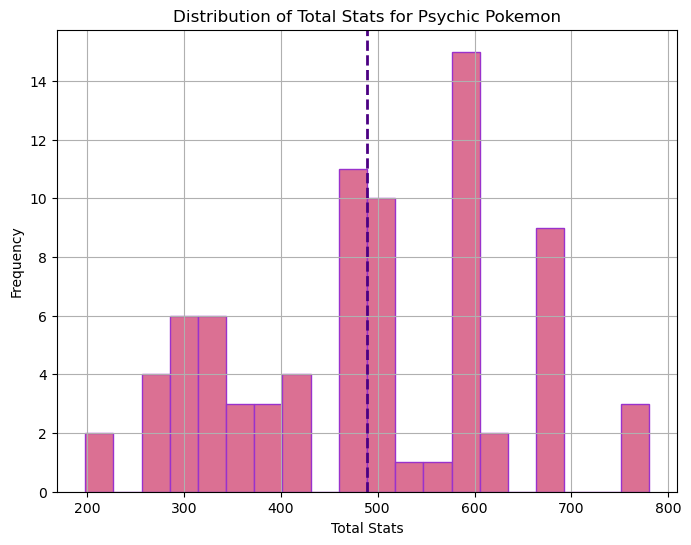

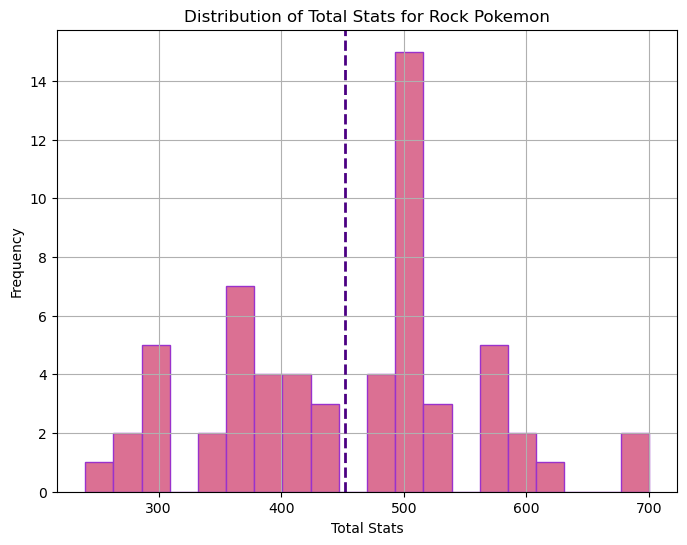

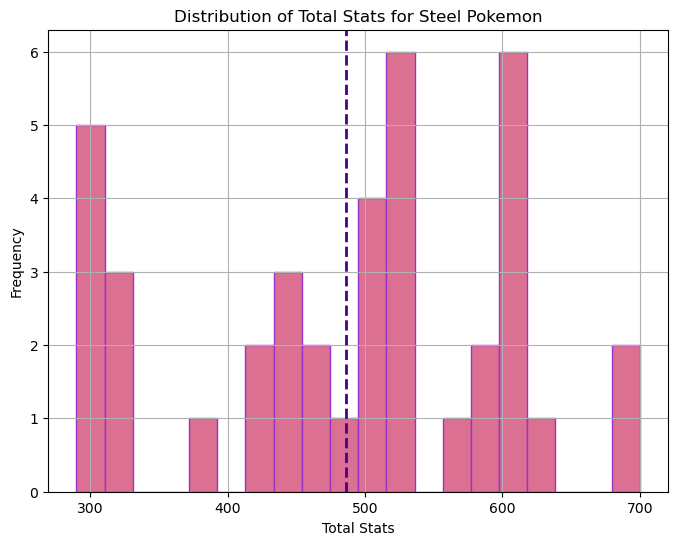

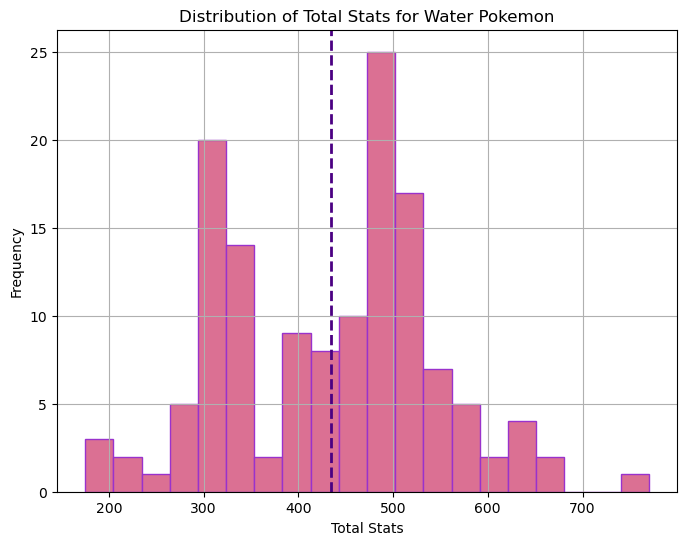

In [142]:

for type_name, group in df.groupby("type1"):
    plt.figure(figsize=(8, 6))  
   
    group['total'].hist(bins=20, color = "palevioletred", edgecolor='darkorchid')
    
    plt.xlabel('Total Stats')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Total Stats for {type_name} Pokemon')
    plt.axvline(group['total'].mean(), color='indigo', linestyle='--', linewidth=2, label="mean (legendary)")
    plt.show()


In [143]:
type_stats_total["mean"]

type1
Bug         384.746988
Dark        439.562500
Dragon      536.365854
Electric    450.333333
Fairy       441.695652
Fighting    452.311111
Fire        458.582090
Flying      446.111111
Ghost       444.674419
Grass       421.842105
Ground      432.547619
Ice         432.947368
Normal      403.333333
Poison      436.190476
Psychic     488.987500
Rock        451.850000
Steel       486.358974
Water       434.000000
Name: mean, dtype: float64

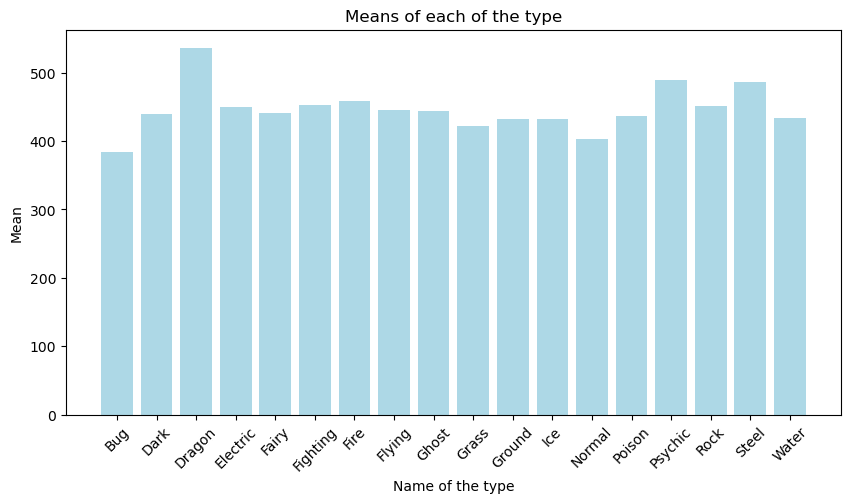

In [144]:
plt.figure(figsize=(10, 5))
plt.bar(type_stats_total["mean"].index.astype(str), type_stats_total["mean"].values, color=["lightblue"])
plt.xlabel("Name of the type")
plt.xticks(rotation=45)
plt.ylabel("Mean")
plt.title("Means of each of the type")
plt.show()

### The Null Hypothesis (H₀):
H₀: Dragon-type Pokemon are not stronger than other types (i.e., the mean total stats of Dragon-type Pokemon are less than or equal to the mean of other types

H₁: Dragon-type Pokemon are stronger than other types (i.e., the mean total stats of Dragon-type Pokemon are greater than those of other types).

In [145]:
dragon_pokemon = df[df['type1'] == 'Dragon']['total'] 
other_pokemon = df[~(df['type1'] == 'Dragon')]['total'] 

print(dragon_pokemon.var())
print(other_pokemon.var())

21699.18780487805
14099.325211642952


<Axes: >

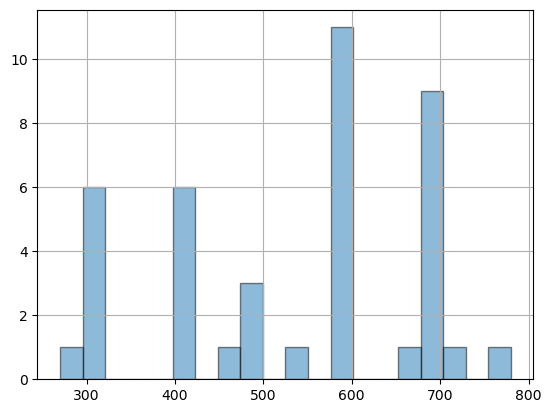

In [146]:
df.loc[df['type1'] == 'Dragon', 'total'].hist(bins=20, edgecolor='black', alpha=0.5)


<Axes: >

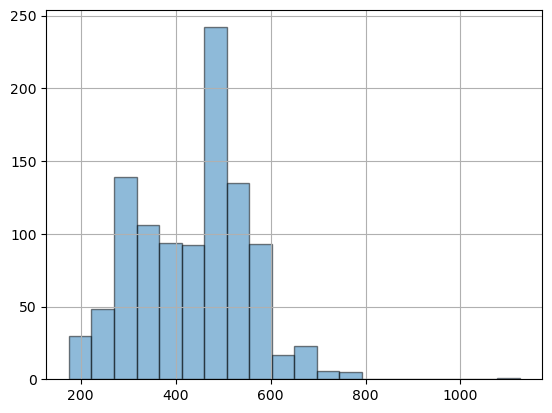

In [147]:
df.loc[df['type1'] != 'Dragon', 'total'].hist(bins=20, edgecolor='black', alpha=0.5)

In [148]:
stat, pvalue = stats.shapiro(dragon_pokemon)
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {pvalue}")
if pvalue>0.01:
    print('fail to reject h0, follows a normal distribution')
else:
    print('reject h0, does NOT follow a normal distribution')


Shapiro-Wilk Test Statistic: 0.9104736368639623
P-value: 0.003429425900551619
reject h0, does NOT follow a normal distribution


In [149]:
stat, pvalue = stats.shapiro(other_pokemon)
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {pvalue}")
if pvalue>0.01:
    print('fail to reject h0, follows a normal distribution')
else:
    print('reject h0, does NOT follow a normal distribution')

Shapiro-Wilk Test Statistic: 0.9746625521412587
P-value: 1.953693236336738e-12
reject h0, does NOT follow a normal distribution


#### The p-values are super small, therefore we can conclude that both of the distributions are not normal. KS Test preferred over Student's t-test.

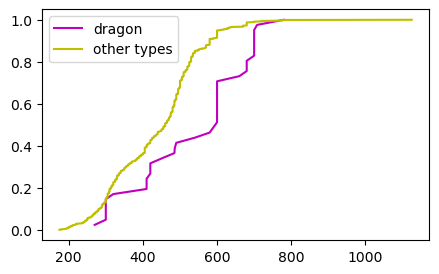

In [150]:
fig, ax = plt.subplots(figsize = (5,3))

sorted_sample1 = np.sort(dragon_pokemon)
ecdf1 = np.arange(1,len(sorted_sample1)+1)/len(sorted_sample1)
ax.plot(sorted_sample1, ecdf1, color = 'm', label = 'dragon')

sorted_sample2 = np.sort(other_pokemon)
ecdf1 = np.arange(1,len(sorted_sample2)+1)/len(sorted_sample2)
ax.plot(sorted_sample2, ecdf1, color = 'y', label = 'other types')

plt.legend()
plt.show()

In [151]:
ks_stat, p_value = stats.ks_2samp(sorted_sample2, sorted_sample1, alternative='greater')

print(f"K-S Statistic: {ks_stat:.3f}")
print(f"P-value: {p_value:.5f}")

alpha = 0.05  
if p_value < alpha:
    print("Reject H₀: Dragon Pokemon have significantly higher total stats than Non-Dragon Pokemon.")
else:
    print("Fail to reject H₀: No significant evidence that Dragon Pokemon have higher total stats.")

K-S Statistic: 0.445
P-value: 0.00000
Reject H₀: Dragon Pokemon have significantly higher total stats than Non-Dragon Pokemon.
